In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [11]:
df = pl.read_csv('../../DATA/Advertising.csv')

In [12]:
df

TV,radio,newspaper,sales
f64,f64,f64,f64
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
…,…,…,…
38.2,3.7,13.8,7.6
94.2,4.9,8.1,9.7
177.0,9.3,6.4,12.8


In [15]:
df = df.with_columns((df['TV'] + df['radio'] + df['newspaper']).alias('total_spend'))

In [16]:
df

TV,radio,newspaper,sales,total_spend
f64,f64,f64,f64,f64
337.1,37.8,69.2,22.1,444.1
128.9,39.3,45.1,10.4,213.3
132.4,45.9,69.3,9.3,247.6
251.3,41.3,58.5,18.5,351.1
250.0,10.8,58.4,12.9,319.2
…,…,…,…,…
55.7,3.7,13.8,7.6,73.2
107.2,4.9,8.1,9.7,120.2
192.7,9.3,6.4,12.8,208.4


<Axes: xlabel='total_spend', ylabel='sales'>

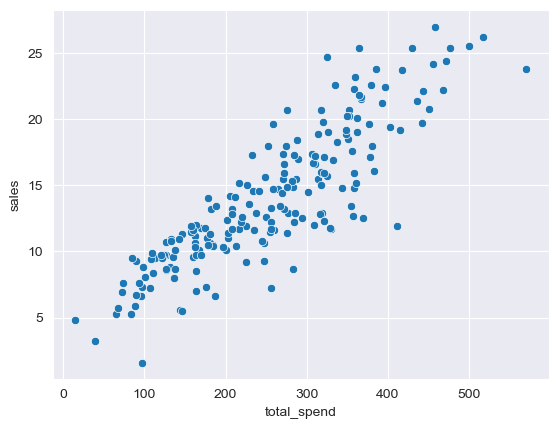

In [18]:
sns.scatterplot(x='total_spend', y='sales', data=df)

<Axes: >

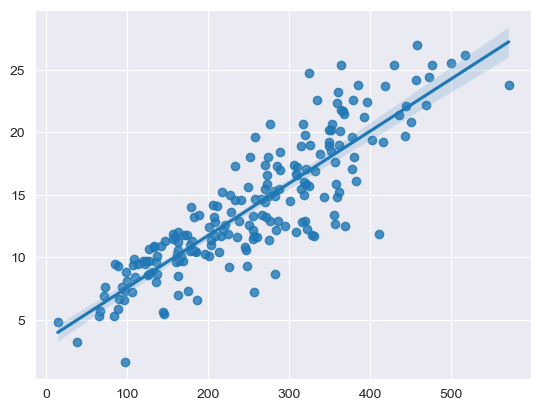

In [19]:
sns.regplot(x='total_spend', y='sales', data=df)

In [20]:
X = df['total_spend']

In [21]:
y = df['sales']

In [24]:
np.polyfit(X,y,1)

array([0.04176603, 3.38558923])

In [25]:
potential_spend = np.linspace(0,500,100)

In [26]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

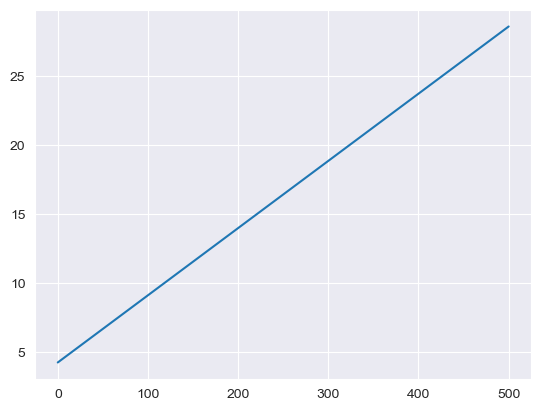

In [27]:
plt.plot(potential_spend,predicted_sales)

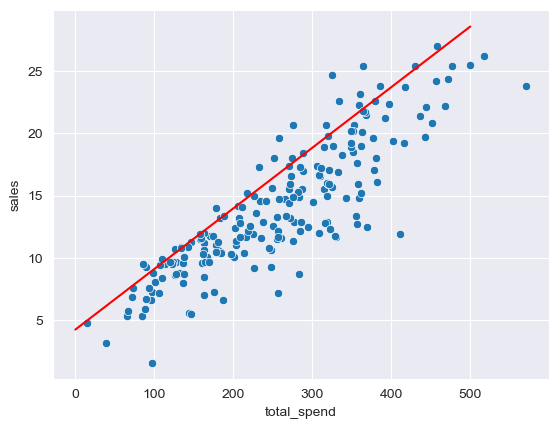

In [28]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

In [29]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [30]:
np.polyfit(X,y,3)

array([-4.15532199e-08,  4.25405579e-05,  2.91655085e-02,  4.40543069e+00])

In [31]:
potential_spend = np.linspace(0,500,100)

In [32]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

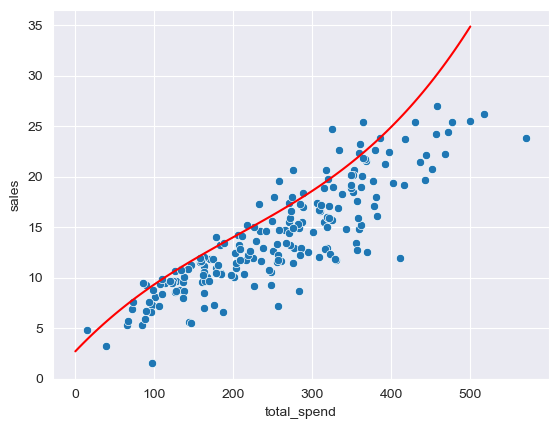

In [33]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

In [34]:
X = df[['TV','radio','newspaper']]
y = df['sales']